# Exploratory Data Analysis on wine review data

### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset


In [2]:
# Load the dataset
file_path = '/Users/sucharita/Desktop/wine_eda_project/data/winemag-data-130k-v2.csv'

df = pd.read_csv(file_path)


In [3]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


### Dataset Overview


In [4]:
# Summary of dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
# Basic statistics
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
# Check for missing values
missing_values=(df.isnull().sum()/len(df))*100

print(missing_values)

Unnamed: 0                0.000000
country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64


### Data Cleaning

In [7]:
df = df.drop(columns=['Unnamed: 0'])


In [8]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [9]:
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [10]:
df["region_2"] = df["region_2"].fillna('Unknown')
df["region_1"] = df["region_1"].fillna('Unknown')
df["designation"] = df["designation"].fillna('not found')
df["taster_twitter_handle"] = df["taster_twitter_handle"].fillna('not found')
df["taster_name"] = df["taster_name"].fillna('Unknown')
df["price"] = df["price"].fillna(df["price"].median())

In [11]:
#sorted data
missing_values=(df.isnull().sum()/len(df))*100

print(missing_values)

country                  0.048472
description              0.000000
designation              0.000000
points                   0.000000
price                    0.000000
province                 0.048472
region_1                 0.000000
region_2                 0.000000
taster_name              0.000000
taster_twitter_handle    0.000000
title                    0.000000
variety                  0.000769
winery                   0.000000
dtype: float64


In [12]:

df.to_csv('/Users/sucharita/Desktop/wine_eda_project/data/cleaned_wine_data.csv', index=False)

### EDA

In [13]:
print("Statistics of numerical data: ")
print(df.describe())

Statistics of numerical data: 
              points          price
count  129971.000000  129971.000000
mean       88.447138      34.646083
std         3.039730      39.664385
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      25.000000
75%        91.000000      40.000000
max       100.000000    3300.000000


 We can see that the values of points are distributed between 80 and 100
 the price have a high difference between the values and a high standard deviation


In prices, the IQR (Interquantil Range) is 25. The max value is 3300;

In [14]:
def cat_points(points):
    if 80 <= points <= 82:
        return 0
    elif 83 <= points <= 86:
        return 1
    elif 87 <= points <= 89:
        return 2
    elif 90 <= points <= 93:
        return 3
    elif 94 <= points <= 97:
        return 4
    else:
        return 5
df["rating_cat"] = df["points"].apply(cat_points)


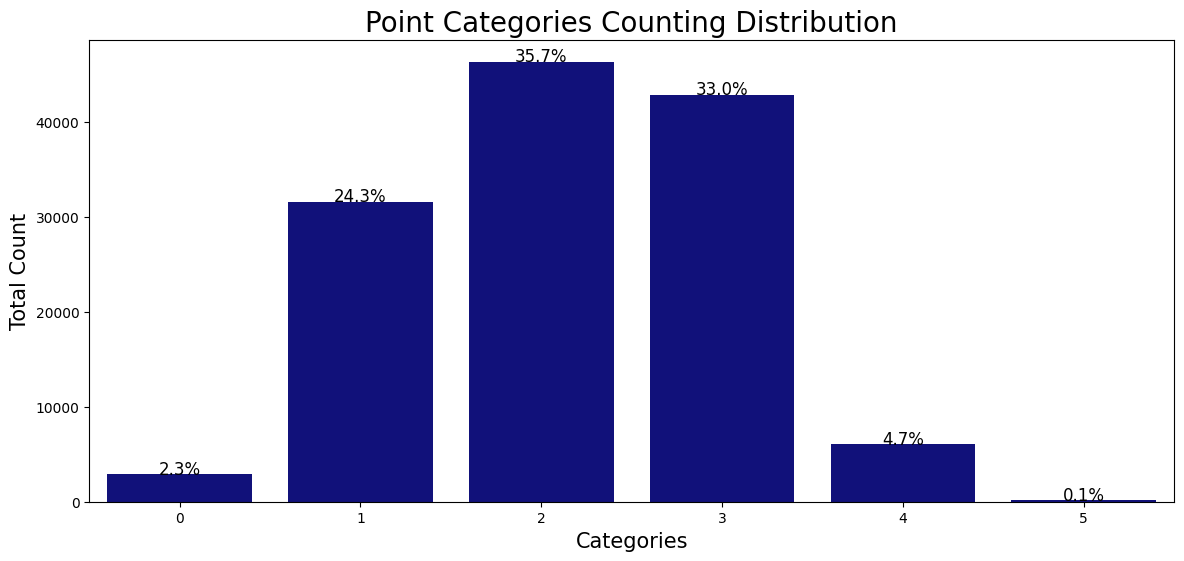

In [15]:
total = len(df)  # Total number of entries
plt.figure(figsize=(14, 6))  # Set the plot size

# Create a count plot
g = sns.countplot(x='rating_cat', color='darkblue', data=df)
g.set_title("Point Categories Counting Distribution", fontsize=20)  # Title
g.set_xlabel("Categories", fontsize=15)  # X-axis label
g.set_ylabel("Total Count", fontsize=15)  # Y-axis label

for bar in g.patches:
    height = bar.get_height()  # Get height of each bar
    percentage = (height / total) * 100  # Calculate percentage
    g.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate
           height + 3,  # Slightly above the bar
           f'{percentage:.1f}%',  # Format percentage
           ha='center', fontsize=12)  # Center-align text


# Show the plot
plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Point Categories Counting Distribution.png')
plt.show()


In [16]:

def analyze_outliers(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    lower_outliers = data[data < lower_bound]
    upper_outliers = data[data > upper_bound]
    total_outliers = pd.concat([lower_outliers, upper_outliers])

    # Calculate statistics
    total_observations = len(data)
    non_outliers = total_observations - len(total_outliers)
    outlier_percentage = (len(total_outliers) / total_observations) * 100

    # Print results
    print(f"Identified lowest outliers: {len(lower_outliers)}")
    print(f"Identified upper outliers: {len(upper_outliers)}")
    print(f"Identified outliers: {len(total_outliers)}")
    print(f"Non-outlier observations: {non_outliers}")
    print(f"Total percentual of Outliers: {outlier_percentage:.4f}")

    return total_outliers


outliers = analyze_outliers(df['points'])


Identified lowest outliers: 0
Identified upper outliers: 52
Identified outliers: 52
Non-outlier observations: 129919
Total percentual of Outliers: 0.0400


In [17]:
outliers = analyze_outliers(df['price'])


Identified lowest outliers: 0
Identified upper outliers: 9053
Identified outliers: 9053
Non-outlier observations: 120918
Total percentual of Outliers: 6.9654


In [18]:
correlation = df['price'].corr(df['points'])
print(f'Correlation between price and points: {correlation}')


Correlation between price and points: 0.39923085896907634


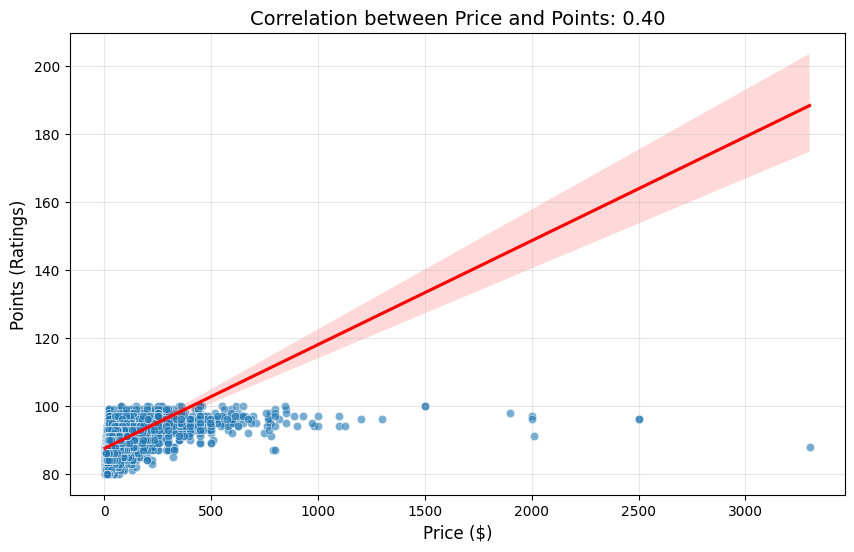

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='points', alpha=0.6)
sns.regplot(data=df, x='price', y='points', scatter=False, color='red')
plt.title(f'Correlation between Price and Points: {correlation:.2f}', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Points (Ratings)', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Correlation between Price and Points.png')
plt.show()

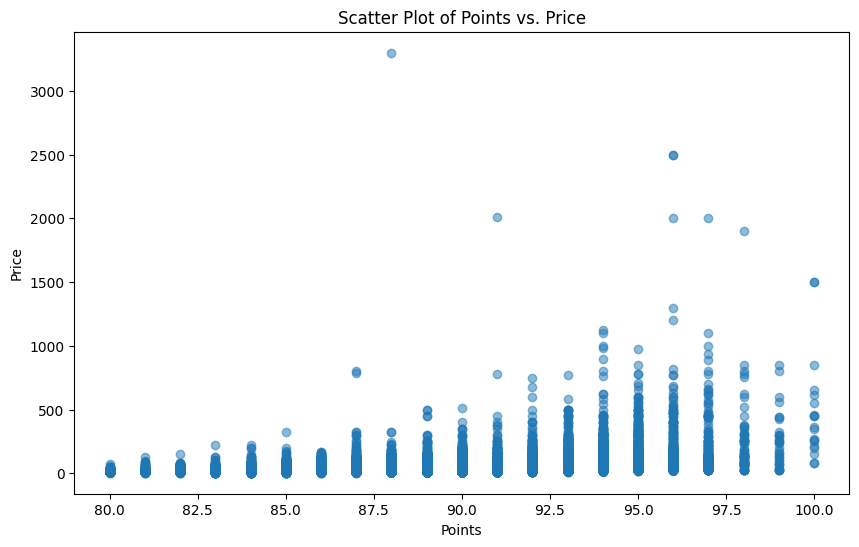

In [20]:
df = df.dropna(subset=['points', 'price'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['points'], df['price'], alpha=0.5)
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Scatter Plot of Points vs. Price')
plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Scatter Plot of Points vs. Price.png')

plt.show()


In [21]:
df['price_log'] = np.log(df['price'])

### price and point distribution

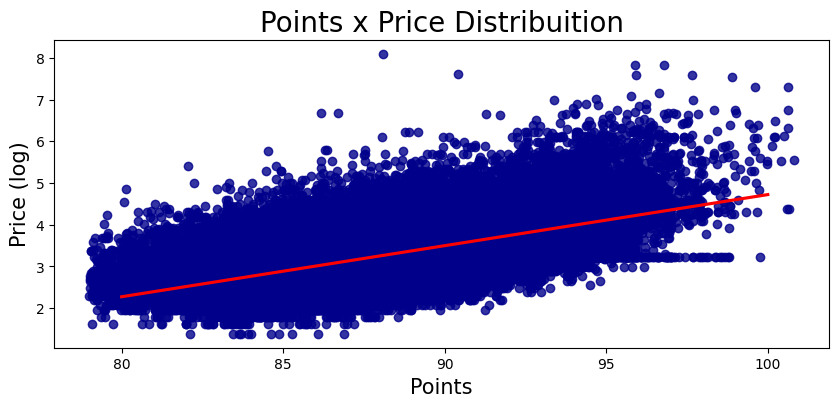

In [22]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkblue')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Points x Price Distribuition.png')
plt.show()

In [23]:
less_than_82 = df[df['points'] < 82].shape[0]
print(f"Number of wines with less than 82 points: {less_than_82}")

more_than_95 = df[df['points'] > 95].shape[0]
print(f"Number of wines with more than 95 points: {more_than_95}")

Number of wines with less than 82 points: 1089
Number of wines with more than 95 points: 881


# country analysis

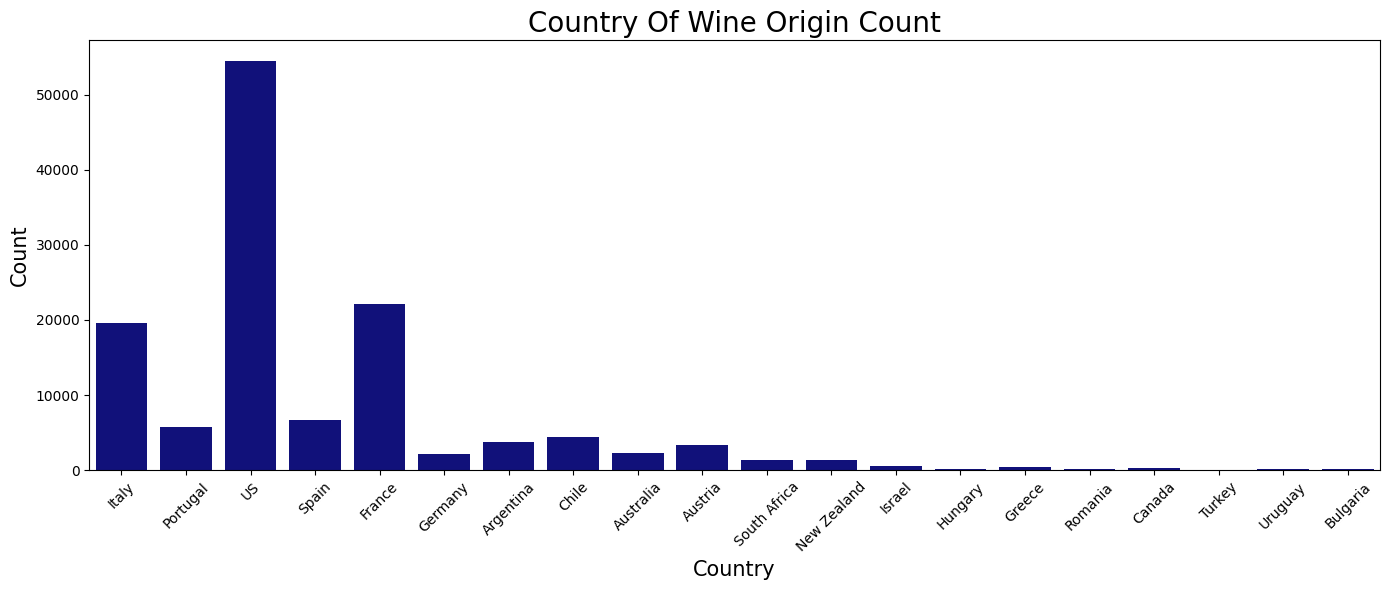

In [24]:


# Assuming your DataFrame is named 'df'
top_20_countries = df['country'].value_counts().head(20)

# Create a count plot using seaborn
plt.figure(figsize=(14, 6))
sns.countplot(x='country', data=df[df['country'].isin(top_20_countries.index)], color='darkblue')

# Set plot title and labels
plt.title("Country Of Wine Origin Count", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Country Of Wine Origin Count.png')

plt.show()

# distribution of top 20 countries by price and ratings

/var/folders/gc/md1z1v2j1dlgdq2xpk9z1lmm0000gn/T/ipykernel_887/850162090.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=45)
/var/folders/gc/md1z1v2j1dlgdq2xpk9z1lmm0000gn/T/ipykernel_887/850162090.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


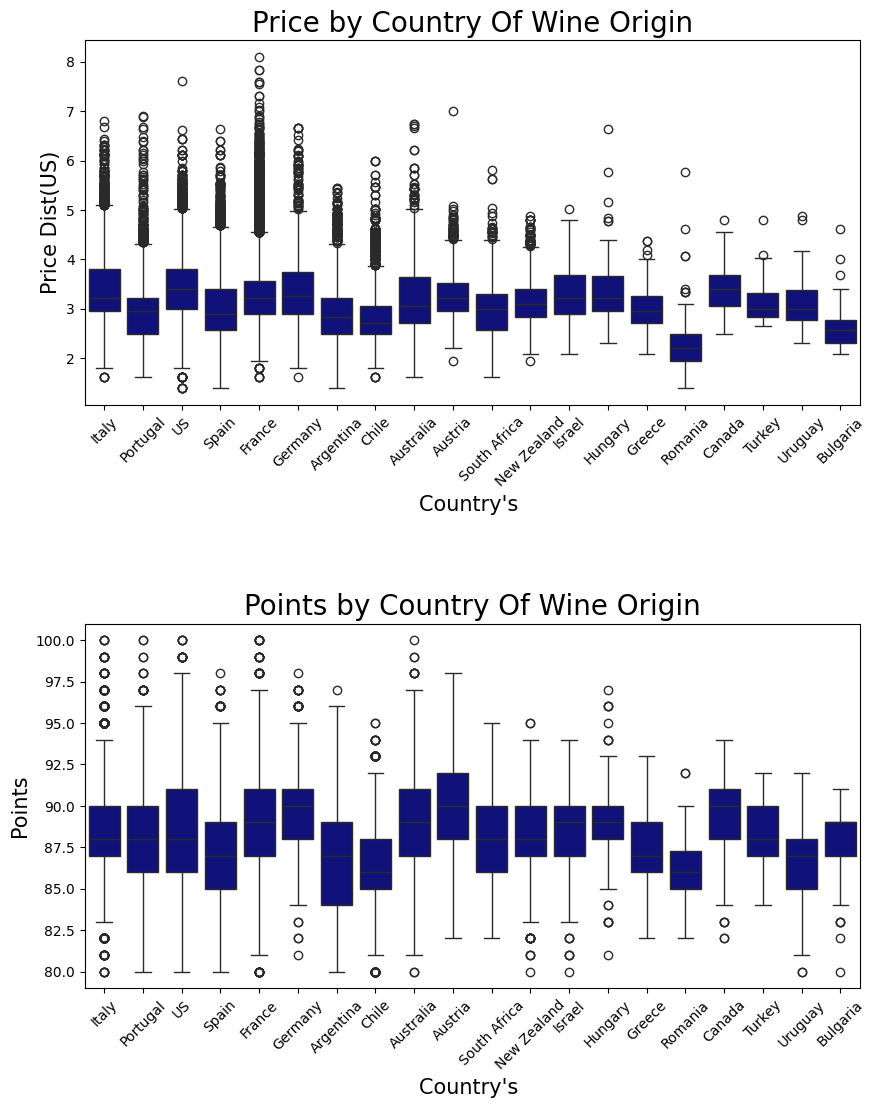

In [25]:
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(top_20_countries.index.values))],
                 color='darkblue')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(top_20_countries.index.values)],
                 color='darkblue')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Price and Points by Country Of Wine Origin.png')

plt.show()

# Tasters

In [26]:
filt_tasters = df[df['taster_name'] != 'Unknown']
top_20_tasters = filt_tasters['taster_name'].value_counts().head(20) 
print(top_20_tasters)

taster_name
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: count, dtype: int64


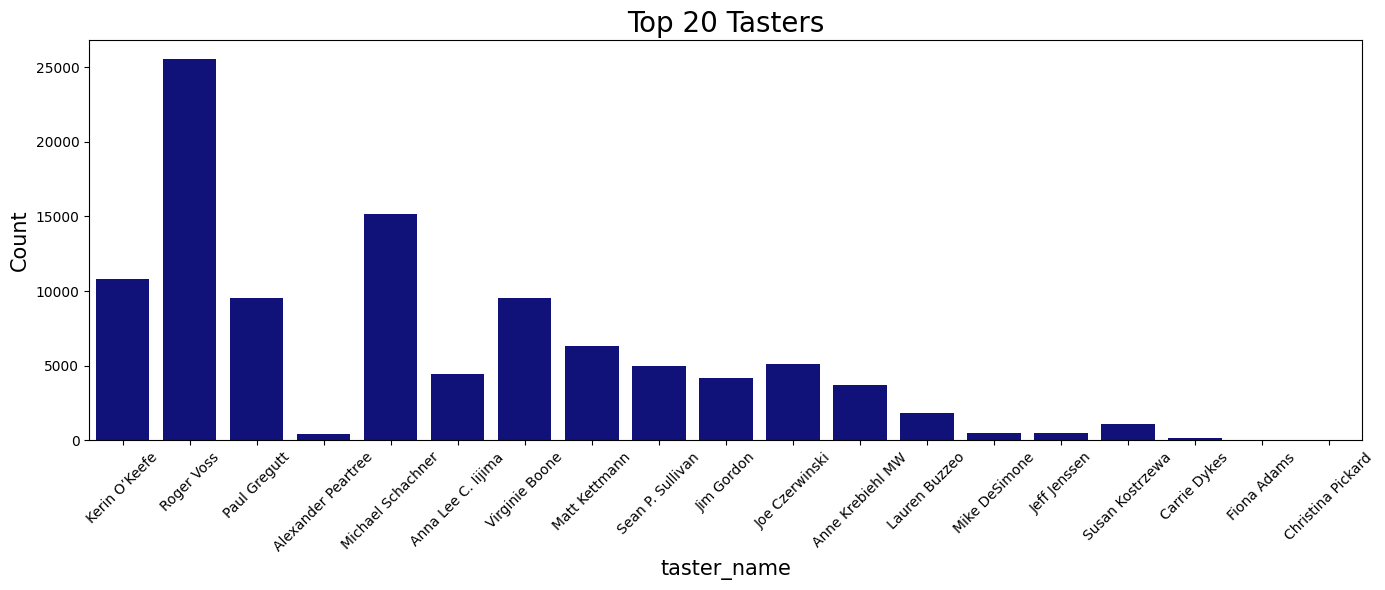

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(x='taster_name', data=df[df['taster_name'].isin(top_20_tasters.index)], color='darkblue')

# Set plot title and labels
plt.title("Top 20 Tasters", fontsize=20)
plt.xlabel("taster_name", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('/Users/sucharita/Desktop/wine_eda_project/outputs/Top 20 Tasters.png')

plt.show()

In [28]:
# Calculate average ratings for tasters
taster_avg_ratings = df.groupby('taster_name')['points'].mean().sort_values(ascending=False)

# Calculate average ratings for wineries
winery_avg_ratings = df.groupby('winery')['points'].mean().sort_values(ascending=False)

# Filter for tasters/wineries with at least 'min_reviews' reviews
min_reviews = 50  # Adjust as needed
taster_avg_ratings_filtered = taster_avg_ratings[df.groupby('taster_name')['points'].count() >= min_reviews]
winery_avg_ratings_filtered = winery_avg_ratings[df.groupby('winery')['points'].count() >= min_reviews]

# Print or visualize the results
print("Top-Rated Tasters:")
print(taster_avg_ratings_filtered.head(10))  # Print top 10 tasters

print("\nTop-Rated Wineries:")
print(winery_avg_ratings_filtered.head(10))  # Print top 10 wineries



Top-Rated Tasters:
taster_name
Anne Krebiehl MW    90.562551
Matt Kettmann       90.008686
Virginie Boone      89.213379
Mike DeSimone       89.101167
Paul Gregutt        89.082564
Kerin O’Keefe       88.867947
Sean P. Sullivan    88.755739
Roger Voss          88.708003
Jim Gordon          88.626287
Joe Czerwinski      88.536235
Name: points, dtype: float64

Top-Rated Wineries:
winery
Cayuse                    93.888889
Betz Family               92.924528
Lynmar                    92.805085
Williams Selyem           92.744076
K Vintners                92.696970
Trisaetum                 92.600000
Robert Weil               92.557377
Merry Edwards             92.545455
Domaine Zind-Humbrecht    92.524752
Carlisle                  92.421053
Name: points, dtype: float64


In [29]:
# Filter out rows with 'Unknown' taster_name
filtered_df = df[df['taster_name'] != 'Unknown'] 

# Calculate average points given by each taster to wines from each winery
taster_winery_avg_points = filtered_df.groupby(['taster_name', 'winery'])['points'].mean().reset_index()

# Calculate average points given by each taster across all wines
taster_avg_points = filtered_df.groupby('taster_name')['points'].mean().reset_index()
taster_avg_points = taster_avg_points.rename(columns={'points': 'overall_avg_points'})

# Merge the DataFrames on taster_name
taster_winery_avg_points = pd.merge(taster_winery_avg_points, taster_avg_points, on='taster_name')

# Calculate the difference between points and overall_avg_points
taster_winery_avg_points['points_diff'] = taster_winery_avg_points['points'] - taster_winery_avg_points['overall_avg_points']

# Sort the DataFrame in descending order of points_diff
taster_winery_avg_points = taster_winery_avg_points.sort_values('points_diff', ascending=False)

# Display the top 10 rows
print(taster_winery_avg_points.head(10))

             taster_name                 winery     points  \
13872         Roger Voss                  Salon  98.333333   
8638   Michael Schachner  Tenuta dell'Ornellaia  96.000000   
2928      Joe Czerwinski               Standish  97.000000   
13150         Roger Voss             J.L. Chave  97.000000   
7068   Michael Schachner           Campo Eliseo  95.000000   
8324   Michael Schachner                  Petra  95.000000   
8613   Michael Schachner             Taittinger  95.000000   
11408         Roger Voss         Château Pétrus  96.666667   
15043     Virginie Boone            Alpha Omega  96.700000   
14677    Susan Kostrzewa         Abraham Perold  94.000000   

       overall_avg_points  points_diff  
13872           88.708003     9.625330  
8638            86.907493     9.092507  
2928            88.536235     8.463765  
13150           88.708003     8.291997  
7068            86.907493     8.092507  
8324            86.907493     8.092507  
8613            86.907493     

In [31]:
average_ratings = df.groupby('variety')['points'].mean().reset_index()
highest_rated_varieties = average_ratings.sort_values(by='points', ascending=False)

print("Wine varieties with the highest average ratings:")
print(highest_rated_varieties.head(10))

Wine varieties with the highest average ratings:
                 variety     points
597            Terrantez  95.000000
610       Tinta del Pais  95.000000
208      Gelber Traminer  95.000000
68                  Bual  94.142857
533              Sercial  94.000000
480  Riesling-Chardonnay  94.000000
469              Ramisco  93.000000
203    Garnacha-Cariñena  93.000000
54         Blauburgunder  93.000000
366           Muscadelle  92.500000


# Questions
1. what is the distribution of wine ratings across diff. countries ?
2. how does wine price vary by country, region, or variety?--
3. which wine varieties have the hightest ratings on average?
4. is there a correlation between price and points (higher price=better ratings) 
5. which tasters or wineries consistently rate winees higher ?